In [7]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [42]:
class Source:
    def __init__(self, sigma, xs, ys):
        self.sigma = sigma
        self.xs = xs
        self.ys = ys
        
    def streamfunction(self, x, y):
        psi = (self.sigma / (2 * numpy.pi) * 
               numpy.arctan2(y - self.ys, x - self.xs))
        return psi
    def velocity(self, x, y):
        u = (self.sigma / (2 * numpy.pi) *
                  (x - self.xs) / ((x - self.xs)**2 + (y - self.ys)**2))
        v = (self.sigma / (2 * numpy.pi) * 
                  (y - self.ys) / ((x - self.xs)**2 + (y - self.ys)**2))
        return u, v

In [43]:
s1 = Source(5.0, 0.0, 1.0)

In [44]:
print(type(s1))

<class '__main__.Source'>


In [45]:
s1.sigma

5.0

In [46]:
x, y =1.1, 2.2
psi = s1.streamfunction(x, y)
print(psi)
psi2 = Source.streamfunction(s1, x, y)
print(psi2)

0.659577123916655
0.659577123916655


In [48]:
u, v = s1.velocity(x, y)
print(u)
print(v)

0.3303215800020469
0.3603508145476876


In [67]:
N = 50
x_start, x_end = -2.0, 2.0
y_start, y_end = -1.0, 1.0
x = numpy.linspace(x_start, x_end, N)
y = numpy.linspace(y_start, y_end, N)
X, Y = numpy.meshgrid(x,y)
source = Source(1.0, 0.0, 0.5)
psi_source = source.streamfunction(X,Y)
u_source, v_source = source.velocity(X,Y)

In [68]:
source_image = Source(1.0, 0.0, -0.5)
u_image, v_image = source_image.velocity(X,Y)
psi_image = source_image.streamfunction(X,Y)

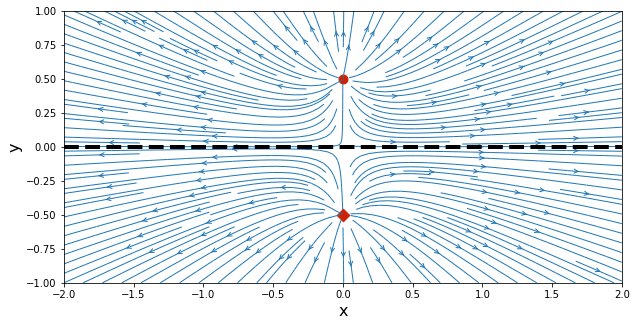

In [69]:
u = u_source + u_image
v = v_source + v_image
psi = psi_source + psi_image
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(source.xs, source.ys, color='#CD2305', s=80, marker='o')
pyplot.scatter(source_image.xs, source_image.ys, color='#CD2305', s=80, marker='D')
pyplot.axhline(0., color='k', linestyle='--', linewidth=4);

In [75]:
class Vortex:
    def __init__(self, gamma, xs, ys):
        self.gamma = gamma
        self.xs = xs
        self.ys = ys
    def velocity(self, X, Y):
        u = (+self.gamma / (2 * numpy.pi) *
            (Y - self.ys) / ((X - self.xs)**2 + (Y - self.ys)**2))
        v = (-self.gamma / (2 * numpy.pi) *
            (X - self.xs) / ((X - self.xs)**2 + (Y - self.ys)**2))
        return u, v
    def stream_function(self, X, Y):
        psi = (-self.gamma / (4 * numpy.pi) *
              numpy.log((X - self.xs)**2 + (Y - self.ys)**2))
        return psi

In [80]:
gamma_vor = 1.0
x_v, y_v = 0.0, 0.5

vortex = Vortex(gamma_vor, x_v, y_v)
u_vor, v_vor = vortex.velocity(X,Y)
vor_psi = vortex.stream_function(X,Y)

vortex_image = Vortex(-gamma_vor, x_v, -y_v)
u_vor_image, v_vor_image = vortex_image.velocity(X,Y)
vor_psi_image = vortex_image.stream_function(X,Y)

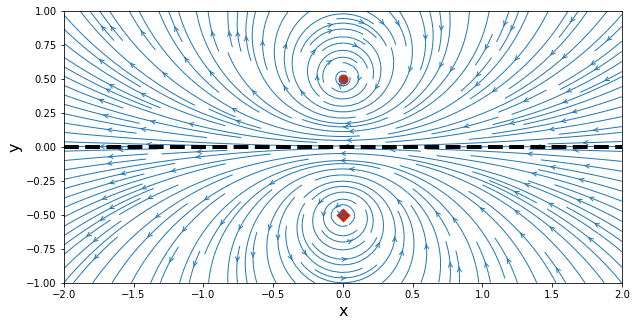

In [81]:
u = u_vor + u_vor_image
v = v_vor + v_vor_image
psi = vor_psi + vor_psi_image
# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(vortex.xs, vortex.ys, color='#CD2305', s=80, marker='o')
pyplot.scatter(vortex_image.xs, vortex_image.ys, color='#CD2305', s=80, marker='D')
pyplot.axhline(0., color='k', linestyle='--', linewidth=4);

In [83]:
gamma_vor = 1.0
x_vor1, y_vor1 = -0.1, 0.5
x_vor2, y_vor2 = +0.1, 0.5

vor1 = Vortex(+gamma_vor, x_vor1, y_vor1)
vor2 = Vortex(-gamma_vor, x_vor2, y_vor2)

u_vor1, v_vor1 = vor1.velocity(X, Y)
psi_vor1 = vor1.stream_function(X, Y)
u_vor2, v_vor2 = vor2.velocity(X, Y)
psi_vor2 = vor2.stream_function(X, Y)

vor1_image = Vortex(-gamma_vor, x_vor1, -y_vor1)
vor2_image = Vortex(+gamma_vor, x_vor2, -y_vor2)

u_vor1_image, v_vor1_image = vor1_image.velocity(X,Y)
psi_vor1_image = vor1_image.stream_function(X,Y)
u_vor2_image, v_vor2_image = vor2_image.velocity(X,Y)
psi_vor2_image = vor2_image.stream_function(X,Y)

u = u_vor1 + u_vor2 + u_vor1_image + u_vor2_image
v = v_vor1 + v_vor2 + v_vor1_image + v_vor2_image
psi = psi_vor1 + psi_vor1_image + psi_vor2 + psi_vor2_image

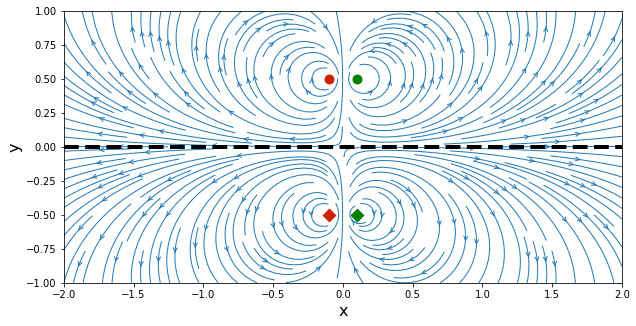

In [84]:
# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(vor1.xs, vor1.ys, color='#CD2305', s=80, marker='o')
pyplot.scatter(vor2.xs, vor2.ys, color='g', s=80, marker='o')
pyplot.scatter(vor1_image.xs, vor1_image.ys, color='#CD2305', s=80, marker='D')
pyplot.scatter(vor2_image.xs, vor2_image.ys, color='g', s=80, marker='D')
pyplot.axhline(0.0, color='k', linestyle='--', linewidth=4);